<a class="anchor" id="0.1"></a>
# **Table of Contents** 

[1. DataSet Details](#1) 

* [1.1 Variables in Panel Data](#1.1) 

* [1.2 Description Of Variable](#1.2) 

[2. Panel Data](#) 

* [2.1 Types of Panel Data](#2.1) 

[3. Importing Data](#3) 

[4. Data Analysis](#4) 

[5. Missing Value Analysis](#5) 

[6. Balance or Imbalance Panel Data?](#6) 

[7. Correlation](#7) 

[8. Heterogeneity](#8) 

* [8.1 Heterogeneity Across Airline](#8.1) 

* [8.2 Heterogeneity Across Airline](#8.2) 

[9. Visualization ](#9)

[10. Estimation Methods](#10)

[11. Pooled OLS](#11)

* [11.1 Pooled OLS Regression Analysis](#11.1)

[12. Fixed Effect Model](#12)

* [12.1 Least Squares Dummy Variable Model (LSDV)](#12.1)

    * [12.1.1 LSDV Regression Summary](#12.1.1)
    
    * [12.1.2 LSDV Regression Analysis](#12.1.2)
    
    * [12.1.3 yhat analysis](#12.1.3)
    
    * [12.1.4 Visualization](#12.1.4)
 
* [12.2 Fixed Effects using Within Model](#12)

    * [12.2.1 Fixed Effect Within Model Regression Analysis](#12.2.1)
    
    * [12.2.2 Fixed Effect Within Model Regression Analysis](#12.2.2)
    
    * [12.2.3 Fixed Effects Estimates](#12.2.3)

[13. Pooled OLS vs Fixed Effect Model](#13)

[14. One-Way and Two-Way Error Component](#14)

[15. Random Effect Model](#15)

* [15.1 Random Effect Model Regression Summary](#15.1)

* [15.2 Random Effect Model Regression Analysis](#15.2)

[16. Hausman Test](#16)

[17. Heteroscedasticity](#17)

* [17.1 Graphical Method](#17.1)

* [17.2 Breusch-Pagan (BP) Test](#17.2)

* [17.3 Box-Cox transformation - To rectify Heteroscedasticity](#17.3)

* [Heteroscedasticity Consistent Coefficients](#17.4)

[18. Reference](#18)

<a id="1"></a> <br>
# 1. DataSet Details

[Go to Top](#0.1)

The Dataset is taken from NYU Stern School of Business, Econometric Analysis, 5th Edition. Panel dataset consists of cross-sectional data, containing cost data of US airlines for 15 years from 1970 to 1984. 

There is a total of 90 observations on 6 airline firms. These data are a subset of a larger data set provided to the author by Professor Moshe Kim. They were originally constructed by Christensen Associates of Madison, Wisconsin.

<a id="1.1"></a> <br>
# 1.1 Variables in Panel Data

In this panel dataset variables used are:
* I = Airline, 
* T = Year,
* PF = Fuel price,
* LF = Load factor, the average capacity utilization of the fleet.
* Q = Output, in revenue passenger miles, index number,
* C = Total cost, in $1000, the data


<a id="1.2"></a> <br>
# 1.2 Description Of Variables

[Go to Top](#0.1)

I (Airline): I indicate different airline firms and here we are having 6 airline firms.

T (Year): T indicates the year for which cross-sectional data is being observed. Here the duration of T is from 1970 -1984 i.e., for 15 years.

PF (Fuel Price):  The index and price data show the global average price paid at the refinery for aviation jet fuel on the reported date. Fuel Price is always determined by a contract negotiated between an Airline firm and the aviation fuel provider. It is usually a multi-year contract with terms and conditions that determine the price irrespective of the market fluctuation.

LF (Load Factor):  It is a measure of how much of an airline's passenger carrying capacity has been utilized. It generally depends upon flight seating capacity, airline route, demand, etc.,

Q (revenue passenger miles): A revenue passenger mile (RPM) is a transportation industry metric that shows the number of miles traveled by paying passengers and is typically an airline traffic statistic. 

Cost (1000, the data): Depends on various factors including Fuel Price, Load Factor, Lease & Depreciation, Aircraft Maintenance, Labor, and Airport Handling Charges.

<a id="2"></a> <br>
# 2. Panel Data

A panel dataset is referred to as longitudinal data or cross-sectional time-series dataset, which, ideally, provides repeated measurements of a certain number of variables over a period on observed units, such as individuals, households, firms, cities, and states. 

A cross-sectional data set consists of observations on a certain number of variables at a certain point of time whereas a time-series data set consists of a variable or several variables of observations over several periods.

In a panel dataset, the number of repeated measurements on the same variables on the same population or sample can be as small as two. A panel data is easily conceptualized as a three-dimensional structure for each variable: the vertical dimension as time and the horizontal dimension as multiple observations for each variable.
	
Panel data can model both the common and individual behaviors of groups. Panel data contains more information, more variability, and more efficiency than pure time-series data or cross-sectional data.


<a id="2.1"></a> <br>
# 2.1 Types of Panel Data

[Go to Top](#0.1)

* **Micro Panel Data :** 
Micro panels, instead, usually cover a large set of units N for a relatively short number of periods T. Here, the typical example is a survey sample that is repeated over time by interviewing the same persons several times.

* **Macro Panel Data** 
Macro panels are characterized by having a relatively large T and a relatively small N. A typical example is a panel of countries where the variables are macro data like the unemployment rate or the growth rate. These variables are regularly available for a long period and a limited set of countries.

* **Balanced Panel Data**
In a balanced panel, all panel members (cross-sectional data) have measurements in all periods, or each panel member is observed every year.  In a contingency table (or cross-table) of cross-sectional and time-series variables, each cell should have only one frequency.
 If a balanced panel contains N panel members and T periods, the number of observations (n) in the dataset is necessarily n = N×T.

* **Unbalanced Panel Data**
In an unbalanced panel, each panel member in a data set has different numbers of observations, or at least one panel member is not observed every period. Some cells in the contingency table will have zero frequency.
If an unbalanced panel contains N panel members and T periods, then the following strict inequality holds for the number of observations (n) in the dataset: n < N×T.

<a id="3"></a> <br>
# 3. Importing Data

[Go to Top](#0.1)

Here I am loading data from private dataset. However source of dataset is mentioned in session 1.1.

In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "paneldata"

In [2]:
pdata <- read.csv('../input/paneldata/PanelData.csv')

names() function in R Language is used to get or set the name of an Object. This function takes an object i.e., vector, matrix, or data frame as an argument along with the value that is to be assigned as a name to the object. It retrieves the header of the dataset.

<a id="4"></a> <br>
# 4. Data Analysis

[Go to Top](#0.1)

In [3]:
names(pdata)

[1] "I"  "T"  "C"  "Q"  "PF" "LF"

To view the data in the dataset, we can use print (), head (), or just run the dataset name. head () function displays the first 6 lines by default, but we can customize it to display more rows by using the syntax head (pdata, 15).

In [4]:
head(pdata)

,I,T,C,Q,PF,LF
,<int>,<int>,<int>,<dbl>,<int>,<dbl>
1,1,1,1140640,0.952757,106650,0.534487
2,1,2,1215690,0.986757,110307,0.532328
3,1,3,1309570,1.091980,110574,0.547736
4,1,4,1511530,1.175780,121974,0.540846
5,1,5,1676730,1.160170,196606,0.591167
6,1,6,1823740,1.173760,265609,0.575417


In [5]:
nrow(pdata)

[1] 90

In [6]:
ncol(pdata)

[1] 6

In [7]:
summary(pdata)

       I             T            C                 Q          
 Min.   :1.0   Min.   : 1   Min.   :  68978   Min.   :0.03768  
 1st Qu.:2.0   1st Qu.: 4   1st Qu.: 292046   1st Qu.:0.14213  
 Median :3.5   Median : 8   Median : 637001   Median :0.30503  
 Mean   :3.5   Mean   : 8   Mean   :1122524   Mean   :0.54499  
 3rd Qu.:5.0   3rd Qu.:12   3rd Qu.:1345968   3rd Qu.:0.94528  
 Max.   :6.0   Max.   :15   Max.   :4748320   Max.   :1.93646  
       PF                LF        
 Min.   : 103795   Min.   :0.4321  
 1st Qu.: 129848   1st Qu.:0.5288  
 Median : 357434   Median :0.5661  
 Mean   : 471683   Mean   :0.5605  
 3rd Qu.: 849840   3rd Qu.:0.5947  
 Max.   :1015610   Max.   :0.6763  

<a id="5"></a> <br>
# 5. Missing Value Analysis

[Go to Top](#0.1)

To find if there is any null value we can use function NROW (na.omit()). It will omit the rows which have a null value.

In [8]:
NROW(na.omit(pdata))

[1] 90

Here the output is 90. That is the output of NROW (na.omit()) has the same number of rows of the dataset. So it indicates that there is no null value.

<a id="6"></a> <br>
# 6. Balance or Imbalance Panel Data? 

[Go to Top](#0.1)

To check if the panel data is balanced or unbalanced, we can use require(dplyr) which is available in package dplyr. 

In [9]:
require(dplyr)
pdata %>% count(I)

I,n
<int>,<int>
1,15
2,15
3,15
4,15
5,15
6,15


The output indicates for each Airline firm (I) there are cross-sectional data available for the period (here it is each year). Thus, it indicates our dataset is balanced. 

<a id="7"></a> <br>
# 7. Correlation  

[Go to Top](#0.1)

Correlation between two variables determines if two variables are significantly linearly related and provide information on the strength and direction of the linear relationship between two variables. 

The correlation coefficient, r, can take on values between -1 and 1. 

* If r = 1, indicates there is a perfect positive correlation between variables.
* If r = 0, there is no linear relationship between the two variables
* If r = -1, indicates there is a perfect negative correlation between variables. 


In [10]:
corrl<-cor(pdata)
corrl

,I,T,C,Q,PF,LF
I,1.00000000,0.0000000,-0.7086242,-0.8679359,0.01329393,-0.3399570
T,0.00000000,1.0000000,0.5000271,0.2711141,0.93118760,0.6001491
C,-0.70862418,0.5000271,1.0000000,0.9263269,0.47904374,0.4143377
Q,-0.86793588,0.2711141,0.9263269,1.0000000,0.22761248,0.4248100
PF,0.01329393,0.9311876,0.4790437,0.2276125,1.00000000,0.4867001
LF,-0.33995702,0.6001491,0.4143377,0.4248100,0.48670012,1.0000000


To visually represent correlation, “corrplot” library is required and the line of code for the same is below:

corrplot 0.88 loaded



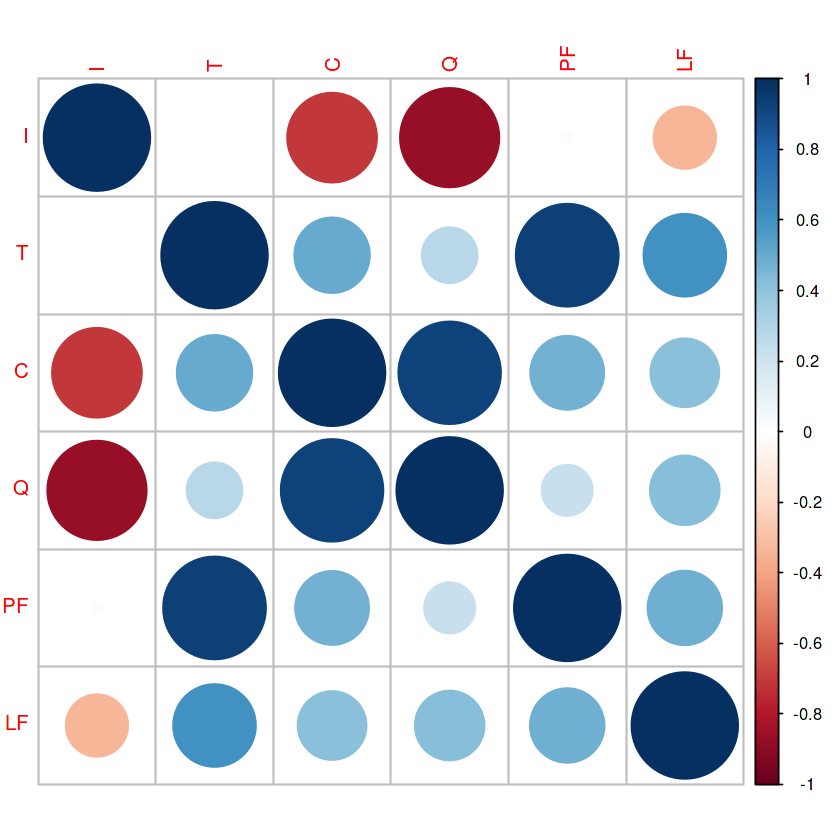

In [11]:
library(corrplot)
corrplot::corrplot(corrl)

In this visual representation of correlation, positive correlations are displayed in blue and negative correlations in red color. The color intensity and the size of the circle are proportional to the correlation coefficients. 

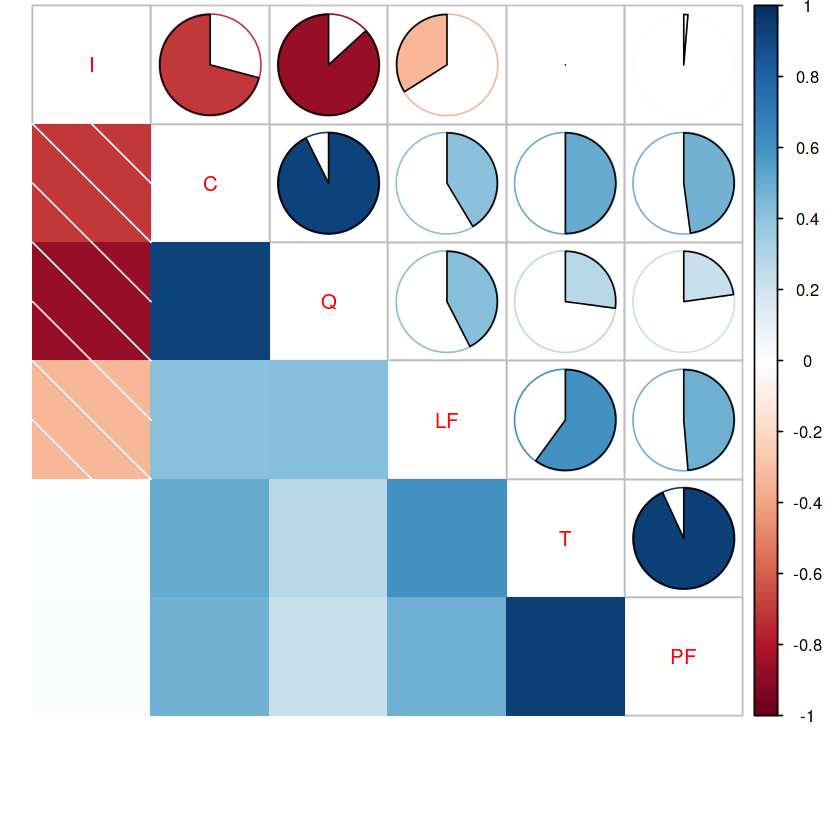

In [12]:
corrplot.mixed(corrl, lower = 'shade', upper = 'pie', order = 'hclust')

<a id="8"></a> <br>
# 8. Heterogeneity 

[Go to Top](#0.1)

Heterogeneity occurs when a predictor(s) is omitted (omitted variable bias), and it gets reflected in the error term which leads to biased and counterintuitive estimates. When a predictor(s) is correlated to the error term it is referred to as endogeneity.

Heterogeneity varies across individual units of observations, and since we cannot observe this variation or heterogeneity it is described as unobserved heterogeneity.


For our panel data heterogeneity can occur for inflight services and ground services provided by an airline to the customers, management attitude, location, and terminal of operation of airline, airline policies, etc.

In R we can visualize heterogeneity by using “plotmeans” which is available in library “gplots”. Here we can visualize heterogeneity across 
* Airline firms 
* Time of observation.


<a id="8.1"></a> <br>
# 8.1 Heterogeneity Across Airline

In [13]:
library(gplots)


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




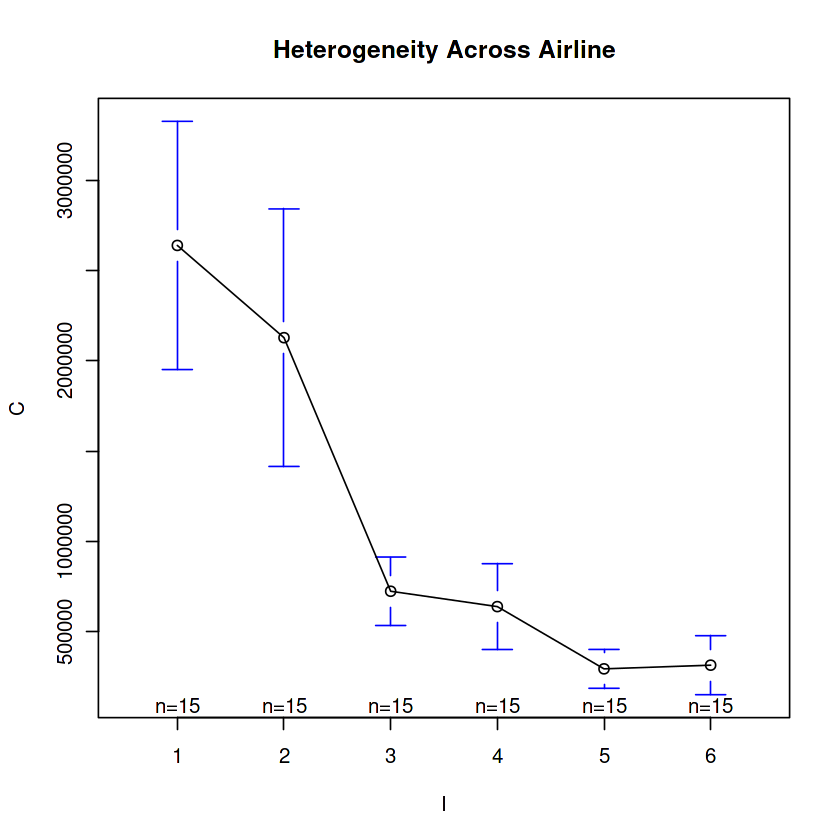

In [14]:
plotmeans(C~I , main = 'Heterogeneity Across Airline', data = pdata)

<a id="8.2"></a> <br>
# 8.2 Heterogeneity Across Year 

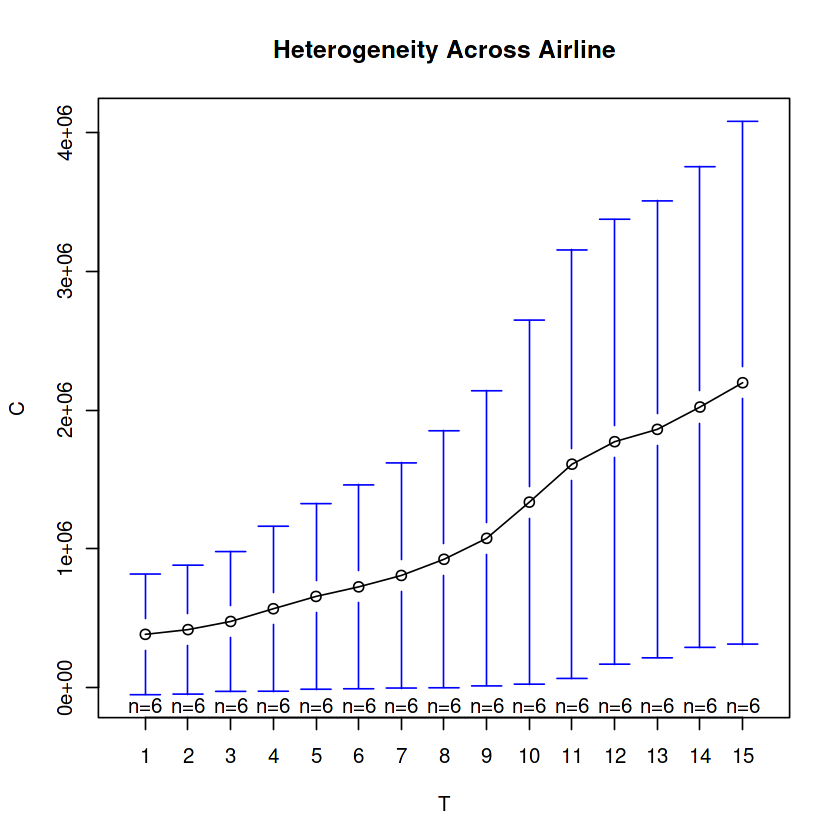

In [15]:
plotmeans(C~T , main = 'Heterogeneity Across Airline', data = pdata)

In the plot circle in between is the mean value and the line on top and below are the interquartile range (Q3 and Q1). It indicates that heterogeneity varies across individual units.

<a id="9"></a> <br>
# 9. Visualization

[Go to Top](#0.1)

## Fuel price Vs Revenue

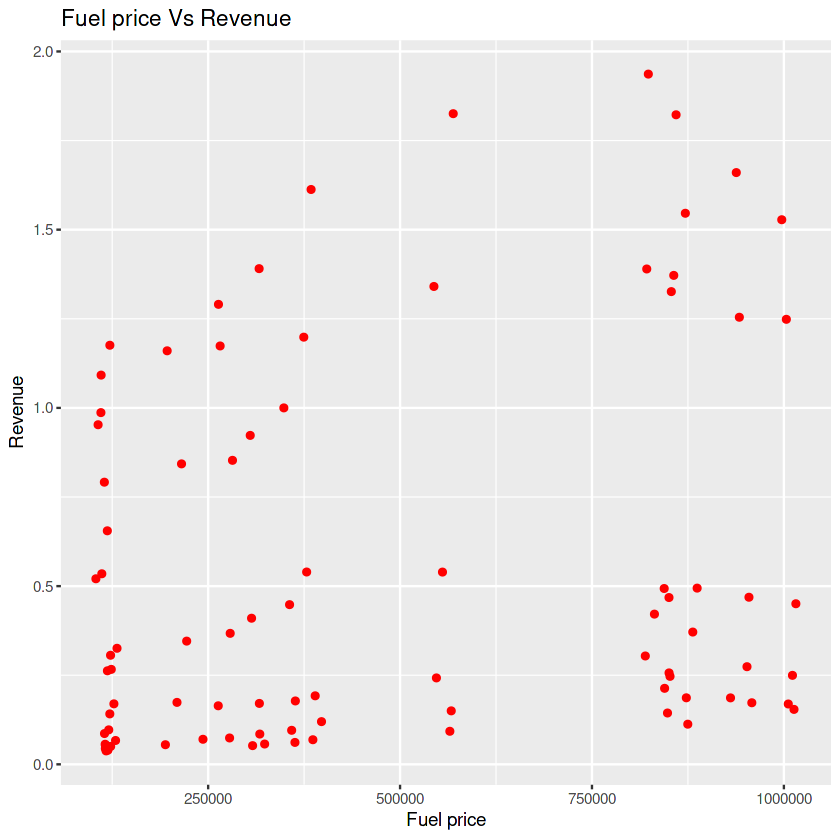

In [16]:
ggplot() + geom_point(aes(pdata$PF, pdata$Q),colour = 'red') + ggtitle('Fuel price Vs Revenue') + 
xlab('Fuel price') + ylab('Revenue')  


## Load factor Vs Revenue

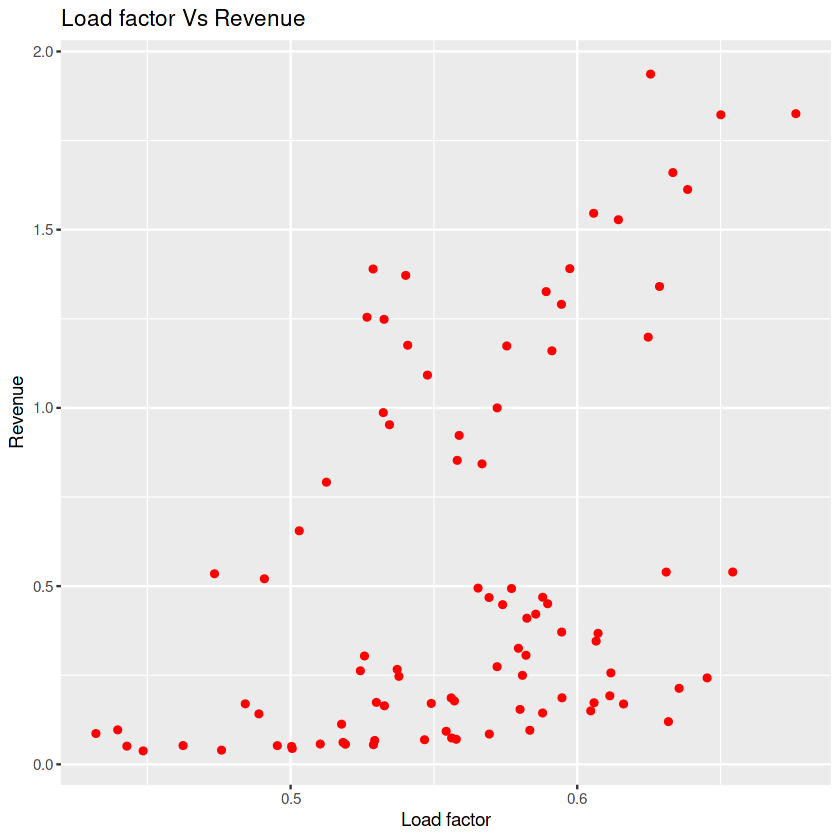

In [17]:
ggplot() +  geom_point(aes(pdata$LF, pdata$Q),colour = 'red') + ggtitle('Load factor Vs Revenue') + 
xlab('Load factor') + ylab('Revenue')

## Output in revenue passenger miles, index number Vs Revenue

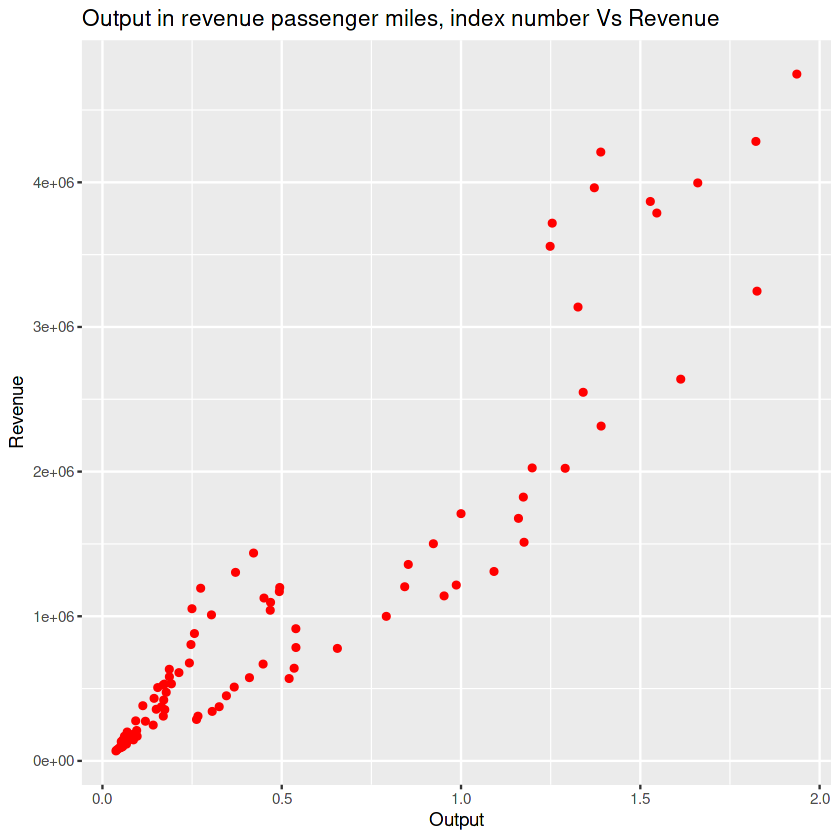

In [18]:
ggplot() + geom_point(aes(pdata$Q, pdata$C), colour = 'red') + ggtitle('Output in revenue passenger miles, index number Vs Revenue')+ xlab('Output') + ylab('Revenue')


## Coplot

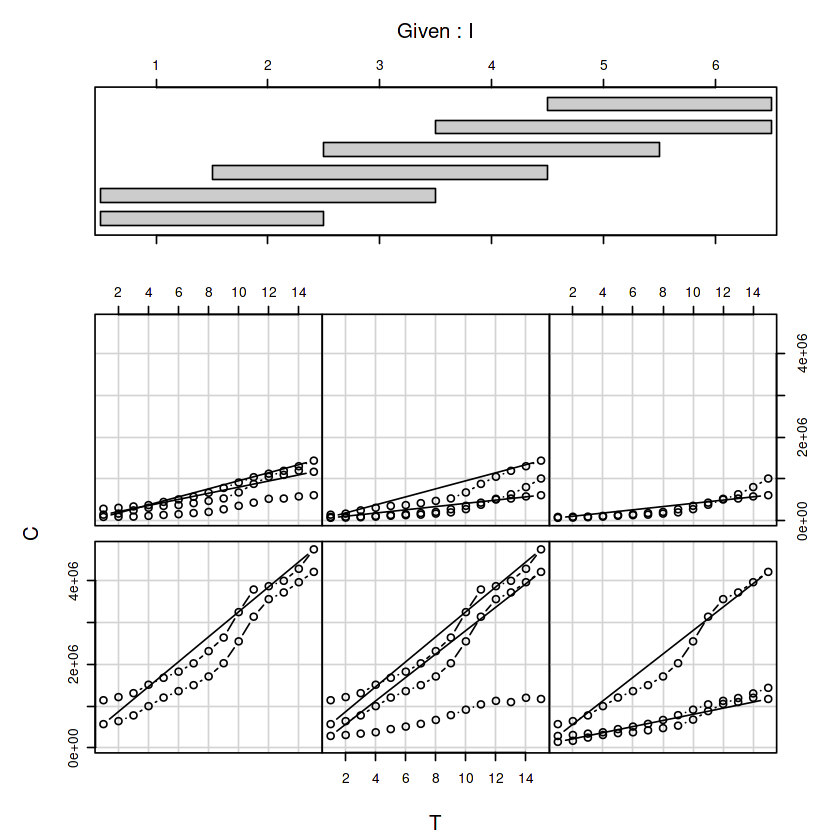

In [19]:
 coplot( C~ T|I, type="b", data=pdata)

<a id="10"></a> <br>
# 10. Estimation Methods

[Go to Top](#0.1)

Panel data contain information on temporal and spatial dimensions. The temporal dimension is the period in which repeated measurements are made such as a month, quarter, and year and the spatial dimension is the unit of observations such as people, firms, and states. The general regression model of panel data can be expressed as follows:

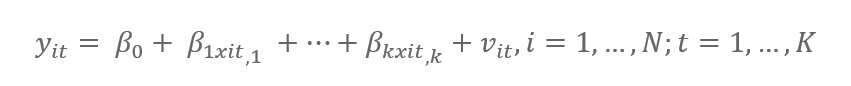

Where,

* i is the unit of observation
* t is the period of time.
* k indicates the kth explanatory variable
* β0 is the intercept
* βK is the coefficient of each explanatory variable.
* vit is the error term.


The so-called composite error term, vit, in the above equation can be decomposed into two components: a cross-sectional unit-specific error, ai, and an idiosyncratic error, uit.

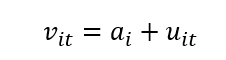

The cross-sectional unit-specific error, ai, does not change over time and the idiosyncratic error, uit, varies over the cross-sectional units and time. The motivation and benefit of decomposing the error terms into two parts is that if we could eliminate some part of them using panel data, we would be better off in terms of minimizing concerns for omitted variable bias caused by unmeasured unit-specific factors. 

Above two equations can be converted to 

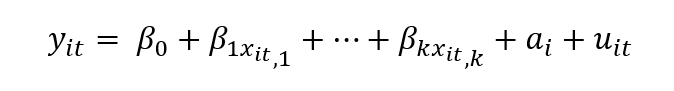

The above equation is called an error component model. The time-constant and unit-specific error, ai, is an unobserved factor. The estimation methods of error component models are classified by how to treat the error term, ai. The pooled OLS model does not distinguish it from other types of errors, whereas the fixed effects model regards it as coefficients to be estimated, and the random-effects model treats it as random variables.

<a id="11"></a> <br>
# 11. Pooled OLS

[Go to Top](#0.1)

The pooled OLS estimation is simply an OLS technique run on Panel data. Panel data contain the information of time and cross-sectional dimensions but pooled OLS, however, disregards this information of panel data. Therefore, all individual-specific effects are completely ignored. 

Equation for Panel data for pooled OLS will be:

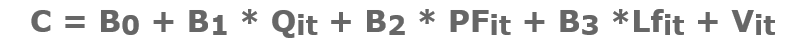

Assumptions:
1. Regression coefficients are the same for all the firms, i.e., B0, B1, B2, B3 are all same for all the firms
2. Errors are not correlated with any of the explanatory variables., cov (Vit, Xit) =0. 
When covariance between error and predictor is not zero, then predictor will be endogenous, and as a result, intercept, and coefficient to be biased and inconsistent.
3. Error terms are normally distributed ε~ N (0, 𝜎2) i.e., the mean is equal to zero (the sum of all errors will be equal to zero (0) or almost 0) and variance 𝜎2 of error terms are equal.

Normality is violated when the variance of the errors is not consistent across observations like when a linear regression model is used to express insurance payout as a function of the age of the customer. Insurance will not be claimed by all individuals who have opted for insurance. Therefore, many zero insurance pay-outs will be there along with a few, extremely high amounts of the insurance payout.


If the sample size is exceptionally large, the central limit theorem would apply, and the variance of the errors will be consistent across observations. But for a small sample size, the standard errors of the output will be impacted. This can be easily detected by plotting a histogram of the residuals.

<a id="11.1"></a> <br>
# 11.1 Pooled OLS Regression Summary

[Go to Top](#0.1)

In [20]:
library(plm)


Attaching package: ‘plm’


The following objects are masked from ‘package:dplyr’:

    between, lag, lead




In R programming, pooled OLS can be estimated by calling “plm” package.

Here we can consider:

**Ho:** Pooled OLS is not the appropriate estimator

**Ha:** Pooled OLS is the appropriate estimator


In [21]:
ols <-plm(C ~ Q+PF+LF, data =pdata, model = "pooling")
summary(ols)

Pooling Model

Call:
plm(formula = C ~ Q + PF + LF, data = pdata, model = "pooling")

Balanced Panel: n = 6, T = 15, N = 90

Residuals:
   Min. 1st Qu.  Median 3rd Qu.    Max. 
-520654 -250270   37333  208690  849700 

Coefficients:
               Estimate  Std. Error t-value  Pr(>|t|)    
(Intercept)  1.1586e+06  3.6059e+05  3.2129   0.00185 ** 
Q            2.0261e+06  6.1807e+04 32.7813 < 2.2e-16 ***
PF           1.2253e+00  1.0372e-01 11.8138 < 2.2e-16 ***
LF          -3.0658e+06  6.9633e+05 -4.4027 3.058e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    1.2647e+14
Residual Sum of Squares: 6.8177e+12
R-Squared:      0.94609
Adj. R-Squared: 0.94421
F-statistic: 503.118 on 3 and 86 DF, p-value: < 2.22e-16

<a id="11.2"></a> <br>
# 11.2 Pooled OLS Regression Analysis

1. P-Value Analysis: - For the overall model p-value less than 5%. When P-Value is less than or equal to 5%, it is statistically important. It indicates that there is strong evidence against the null hypothesis, or it simply states that there is less than a 5% probability that the null hypothesis is correct. So, we can say we can reject the null hypothesis and accept the alternative hypothesis. 

So here we can say that pooled OLS can be a good estimator but cannot accept it because pooled OLS does not consider the heterogeneity across airline firms or years.

2. Individual effects of Q, PF, and LF are also significant as p values are less than 5%.

3. R2: It determines the strength of correlation between the predictors and response. It tells how well the model or regression line “fits” the data. 

Here R2 is equal to 0.94609 which indicates a measure of fitness is good. 

4. Adjusted R2: It is more reliable and accurate for evaluation. As R2 increases even if insignificant predictors are added but Adjusted R2 decreases as insignificant predictors are added. It is mainly used when you compare a model that has a different number of variables.

Here Adjusted R2 is equal to 0.94421 which indicates the model is reliable.

**Even if pooled OLS is having P-Value, less than 5% and R2 and Adjusted R2 indicates overall accuracy is excellent and the model is fit to use, we cannot rely on this model as it completely ignores heterogeneity.**

Other significant factors visible in Regression output are:

1. Standard Error: It is a measure of the precision of the model, and it reflects an average error of the regression model. The standard error of a statistic is the approximate standard deviation of a statistical sample population.  It measures how precisely a sampling distribution represents a population or who much deviation is there from an actual value.


2. T-Stat: The t-statistic is used in a t-test to determine whether to support or reject the null hypothesis. It is used when the sample size is small, or the population standard deviation is unknown. A t-test is a type of inferential statistic used to determine if there is a significant difference between the means of two groups, which may be related to certain features.


For example, the t-statistic is used in estimating the population means from a sampling distribution of sample means if the population standard deviation is unknown. It is used along with P-Value when running hypothesis testing.


<a id="12"></a> <br>
# 12. Fixed Effect Model

A fixed-effect model examines individual differences in intercepts, assuming the same slopes and constant variance across individuals (group and entity) or heterogeneity is fixed across the same panel. 
This fixed effect model is estimated:

1. Least squares dummy variable (LSDV) regression (OLS with a set of dummies) 
2. Incorporate fixed effects directly in R by using the “within” model.


<a id="12.1"></a> <br>
# 12.1 Least Squares Dummy Variable Model (LSDV) 

[Go to Top](#0.1)

The least squares dummy variable model (LSDV) uses dummy variables to estimate the fixed effect model.

LSDV is widely used because it is relatively easy to estimate and interpret. The LSDV works best when the panel data has relatively fewer cases and more time periods, as each dummy variable removes one degree of freedom from the model.  

But it becomes more complex when the number of parameters to be estimated increases, ie. when it includes many dummy variables. In this case, LSDV also loses degrees of freedom but returns less efficient estimators, and here it is better to go with the “within” model.

The general LSDV model is:

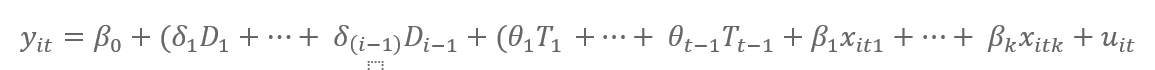

where, 
* Di is dummy variables for each cross-sectional unit excluding one.
* Tt is dummy variables for each time period excluding one

When dealing with a dummy variable, multicollinearity is an important factor to be considered. Multicollinearity occurs when predictors are themselves correlated which in turn leads to Dummy Variable Trap. If you want to read more about multicollinearity, you can read from [here](https://www.kaggle.com/general/294096)


In R programming we are using the “lm” package to estimate LSVD. To assign dummy variables we use the factor () function. Factor () function encodes a vector as a factor and it returns an object of class "factor" which has a set of integer codes the length of x with a "levels" attribute of mode character and unique (!anyDuplicated(.)) entries. It categorizes the data and stores it as levels.

As we are using “lm” package for LSVD estimation we use factor () -1 to avoid dummy variable trap or multicollinearity. Here factor () is used to assign a dummy variable for each airline firm. 

The null hypothesis of LSDV is that all dummy parameters except one are zero: 

H0: D1=⋯=D(i-1)=0  (or H0: T1=⋯=T(t-1)=0). 

If the null hypothesis is rejected, we may conclude that the fixed effect model is better than the pooled OLS model.



<a id="12.1.1"></a> <br>
# 12.1.1 LSDV Regression Summary

In [22]:
fixed.dum <-lm(C ~ Q + PF + LF + factor(I)-1, data =pdata)
summary(fixed.dum)


Call:
lm(formula = C ~ Q + PF + LF + factor(I) - 1, data = pdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-551783 -159259    1796  137226  499296 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
Q           3.319e+06  1.714e+05  19.369  < 2e-16 ***
PF          7.731e-01  9.732e-02   7.944 9.70e-12 ***
LF         -3.797e+06  6.138e+05  -6.187 2.37e-08 ***
factor(I)1 -1.312e+05  3.508e+05  -0.374 0.709286    
factor(I)2  4.705e+05  3.091e+05   1.522 0.131839    
factor(I)3  1.206e+06  3.324e+05   3.628 0.000497 ***
factor(I)4  1.646e+06  3.183e+05   5.172 1.64e-06 ***
factor(I)5  1.697e+06  3.348e+05   5.069 2.48e-06 ***
factor(I)6  1.575e+06  3.073e+05   5.126 1.98e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 210400 on 81 degrees of freedom
Multiple R-squared:  0.985,	Adjusted R-squared:  0.9834 
F-statistic:   593 on 9 and 81 DF,  p-value: < 2.2e-16


<a id="12.1.2"></a> <br>
# 12.1.2 LSDV Regression Analysis

1. Here each airline firm is regarded as a dummy variable for estimation.
2. P-Value: Overall model is good as the p-value less than 5%
3. The individual effect of Q, PF, LF, and all airline firms from 1 to 6 are significant, except for firms 1 and 2.
4. Adjusted R2: Adjusted R2 is 0.9834 which is also more accurate than pooled OLS.


<a id="12.1.3"></a> <br>
# 12.1.3 yhat analysis

[Go to Top](#0.1)

In [23]:
yhat<- fixed.dum$fitted
yhat

1           2           3           4           5           6 
1083791.080 1207663.509 1498597.666 1811708.689 1626507.228 1784765.506 
          7           8           9          10          11          12 
2098147.009 2460456.688 3093693.953 3799402.930 3373744.748 3377885.395 
         13          14          15          16          17          18 
3699025.007 4112830.216 4556830.377  414796.113  533256.408  826705.136 
         19          20          21          22          23          24 
1240344.600 1282430.869 1399606.619 1647115.331 1886659.894 2365302.026 
         25          26          27          28          29          30 
2953419.209 3294804.234 3367385.350 3361938.276 3634397.057 3710093.878 
         31          32          33          34          35          36 
 177678.423  146057.502  106184.966  187523.326  221548.255  335185.608 
         37          38          39          40          41          42 
 591848.787  788630.224  804883.516 1029078.825 1254883.491 1247209.704 
         43          44          45          46          47          48 
1267108.030 1385586.658 1304430.683  381276.193  391009.454  353586.927 
         49          50          51          52          53          54 
 469381.015  372783.870  372065.736  373438.007  402032.892  263870.159 
         55          56          57          58          59          60 
 423763.396  832156.752 1050849.565 1119152.693 1301672.889 1464286.451 
         61          62          63          64          65          66 
 276014.278  205418.279    2317.380    9184.252     271.847   45330.515 
         67          68          69          70          71          72 
  62284.720   75638.891    2861.388  336744.624  598317.955  696653.100 
         73          74          75          76          77          78 
 710491.124  733161.628  644449.018   87574.119   -7523.050  -88700.547 
         79          80          81          82          83          84 
 -62902.097 -100264.471  106339.371   76551.964   91851.933   26963.890 
         85          86          87          88          89          90 
 214966.882  659241.566  667471.959  802003.848 1010745.031 1221216.602

<a id="12.1.4"></a> <br>
# 12.1.4 Visualization

By using scatterplot () function, which is available in package “car” we can plot yhat vs airline for airline each dummy. Scatterplot () function uses basic R graphics to draw a two-dimensional scatterplot, with options to allow for plot enhancements that are often helpful with regression problems. 

Enhancements include adding marginal boxplots, estimated mean and variance functions using either parametric or nonparametric methods, point identification, jittering, setting characteristics of points and lines like color, size and
symbol, marking points and fitting lines conditional on a grouping variable, and other enhancements.



Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




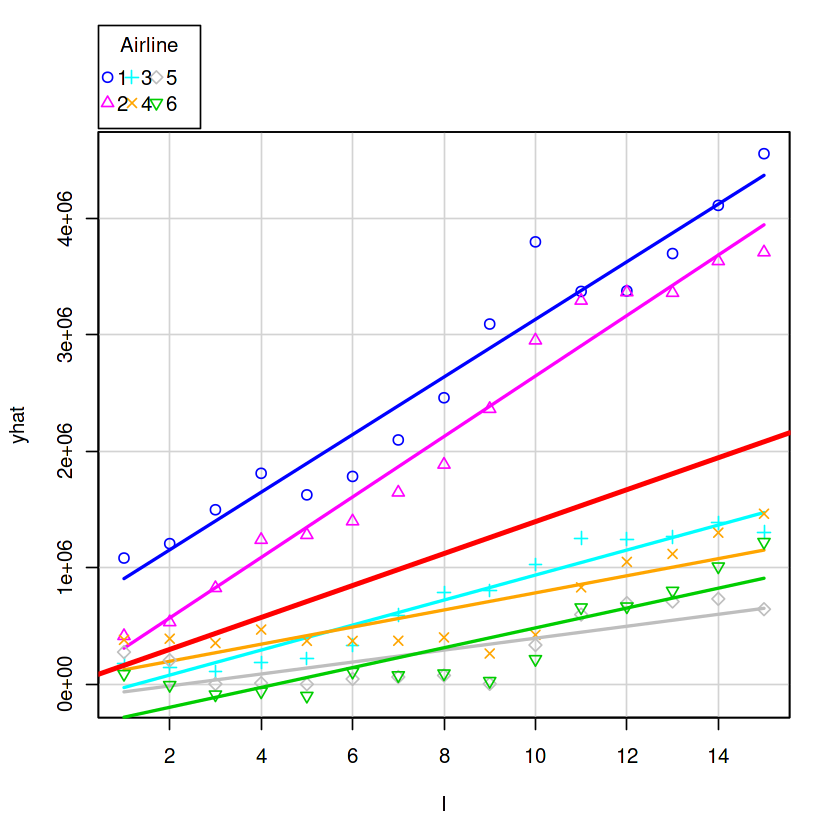

In [24]:
library(car)
Airline<-pdata$I
scatterplot(yhat~ pdata$T| Airline, xlab= "I", ylab ="yhat", boxplots = FALSE, smooth = FALSE)
abline(lm(pdata$C~pdata$T),lwd=3,col="red")

<a id="12.2"></a> <br>
# 12.2 Fixed Effects using Within Model

[Go to Top](#0.1)

This model of estimation uses variation within each panel or entity instead of many dummies and it is estimated by using the “plm” package.

The “within” estimation reports correct the sum of squared errors (SSE). But as no dummy variables are used, the within effect model has larger degrees of freedom for errors, accordingly, reporting small mean squared errors (MSE), standard errors of the estimates (SEE) or the square root of the mean squared errors (SRMSE), and incorrect (smaller) standard errors of parameter estimates.

<a id="12.2.1"></a> <br>
# 12.2.1 Fixed Effect Within Model Regression Summary

In [25]:
fixed <- plm(C ~ Q + PF + LF,data =pdata,model ="within")
summary(fixed)

Oneway (individual) effect Within Model

Call:
plm(formula = C ~ Q + PF + LF, data = pdata, model = "within")

Balanced Panel: n = 6, T = 15, N = 90

Residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-551783 -159259    1796       0  137226  499296 

Coefficients:
      Estimate  Std. Error t-value  Pr(>|t|)    
Q   3.3190e+06  1.7135e+05 19.3694 < 2.2e-16 ***
PF  7.7307e-01  9.7319e-02  7.9437 9.698e-12 ***
LF -3.7974e+06  6.1377e+05 -6.1869 2.375e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    5.0776e+13
Residual Sum of Squares: 3.5865e+12
R-Squared:      0.92937
Adj. R-Squared: 0.92239
F-statistic: 355.254 on 3 and 81 DF, p-value: < 2.22e-16

<a id="12.2.2"></a> <br>
# 12.2.2 Fixed Effect Within Model Regression Analysis

1. P-Value: Overall model is good as the p-value less than 5%

2. The individual effect of Q, PF, and LF are significant as the p-value is less than 5%.

3. R2 and Adjusted R2: Value of R2 and Adjusted R2 are 0.92937 and 0.92239 respectively, which are less than pooled OLS and LSVD.


<a id="12.2.3"></a> <br>
# 12.2.3 Fixed Effects Estimates

For fixed effect heterogeneity is fixed for the individual panel. So here for each airline firm heterogeneity or individual effect is fixed. In R programming fixef () function can be used to extract the estimates of the fixed-effects parameters. 

In [26]:
fixef(fixed)

1       2       3       4       5       6 
-131236  470497 1205944 1646356 1697016 1575238

Heterogeneity value across different firms of the airline is displayed under the airline firm value starting from 1 to 6.

<a id="13"></a> <br>
# 13. Pooled OLS vs Fixed Effect Model

[Go to Top](#0.1)

For comparison of the within and the pooling model for the individual effect we can use function **pFtest()**. 

The argument of pFtest () function is two objects, the first being a within model and the second a pooling model. The effects tested are either individual, time, or two ways, depending on the effects introduced in the within model.

For pFtest () we are considering

**H0:** Pooled OLS model is consistent

**Ha:** Fixed effect model is consistent


In [27]:
pFtest(fixed,ols)


	F test for individual effects

data:  C ~ Q + PF + LF
F = 14.595, df1 = 5, df2 = 81, p-value = 3.467e-10
alternative hypothesis: significant effects


The output of pFtest () indicates the p-value is less than 5%, so we can reject the null hypothesis. **Therefore, the fixed effect model is consistent**

<a id="14"></a> <br>
# 14. One-Way and Two-Way Error Component

[Go to Top](#0.1)

Consider a basic linear unobserved effect panel data model for N panels and T time periods.

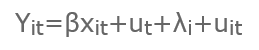

where t=1,2…, T & i = 1,2…, N

The vector xit contains the independent variables and error, 

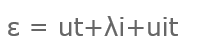

Two-way error model will have both ut and uit as part of error, but for one-way error model time effect error ut = 0. There for error component of one-way error can be represented as 

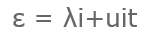

λi is considered as constant in fixed effect but in random effect it is drawn independently from some probability distribution.

Two- way error model can be estimated by using R package “plm” and which correctly adjust the degrees of freedom to include the T - 1 additional parameters compared to the one-way error within estimator. 

Most two-error way model estimators are not limited to balanced panels (only a handful). For short panels running the one-way error within estimator with time dummies is feasible. Even if one gets the estimates for the temporal effects, it is important to notice that as with the LSDV fixed effects for one-way error models these are not consistent as the estimates increase in number and length of panels.

<a id="15"></a> <br>
# 15. Random Effect Model

[Go to Top](#0.1)

In Random effect, the heterogeneity varies across the individual panel. A random-effect model reduces the number of parameters to be estimated but will produce inconsistent estimates when the individual-specific random effect is correlated with regressors. So, a random-effects model assumes that individual effect is not correlated to any of the regressors, and it is estimated as error variances specific to groups or times. 

A random effect is generally represented by 

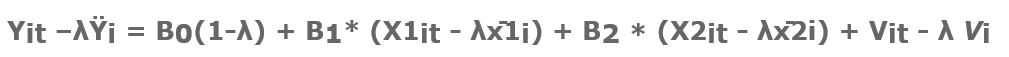

The random effects model is appropriate when the cross-sectional units are randomly selected from a large population. If a variance structure among groups is known, the random effects model is estimated by the generalized least squares (GLS). On the other hand, if the variance structure is not known, the feasible generalized least squares (FGLS) method is appropriate to estimate the variance structure. The Lagrange multiplier (LM) test for the existence of the random effects is designed by Breusch and Pagan (1980).

As compared to the fixed effect model, random effect incorporates firm heterogeneity within the error term rather than specified as dummy variables, while allowing for a common intercept. Unlike in the Fixed effect model where each firm has its intercept value, in the random effect model, the common intercept (B0) is the average of all the firms’ intercepts. The firm-specific error component (εi) measures the random deviation of each firm’s intercept from the common intercept B0.


In pooled OLS we assume covariance between the error term and regressor to be 0. But this assumption could lead to the problem of serial correlation i.e., when errors in each period carry over into future periods, leading to inefficient parameter estimates. Random effect resolves this using the Generalized least square (GLS) approach i.e., putting weights as GLS parameters (λ) [0<= λ <=1]

• If λ = 0 -> Pooled OLS -> Yit = B0 +B1 * X1it + B2*X2it + Vit

• If λ = 1 -> Fixed effect model -> Yit –Ϋi = B1 * (X1it - x̄1i) + B2 * (X2it - x̄2i) + Vit - Vi 




<a id="15.1"></a> <br>
# 15.1 Random Effect Model Regression Summary

In [28]:
random <- plm(C ~ Q+PF+LF,data =pdata, index = c("I","T"),model ="random")
summary(random)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = C ~ Q + PF + LF, data = pdata, model = "random", 
    index = c("I", "T"))

Balanced Panel: n = 6, T = 15, N = 90

Effects:
                    var   std.dev share
idiosyncratic 4.428e+10 2.104e+05 0.793
individual    1.154e+10 1.074e+05 0.207
theta: 0.5486

Residuals:
   Min. 1st Qu.  Median 3rd Qu.    Max. 
-535726 -238494   49890  207491  722934 

Coefficients:
               Estimate  Std. Error z-value  Pr(>|z|)    
(Intercept)  1.0743e+06  3.7747e+05  2.8461  0.004427 ** 
Q            2.2886e+06  1.0949e+05 20.9015 < 2.2e-16 ***
PF           1.1236e+00  1.0344e-01 10.8622 < 2.2e-16 ***
LF          -3.0850e+06  7.2568e+05 -4.2512 2.126e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    6.6198e+13
Residual Sum of Squares: 5.8721e+12
R-Squared:      0.91129
Adj. R-Squared: 0.9082
Chisq: 883.501 on 3 DF, p-value: < 2.22e-16

<a id="15.2"></a> <br>
# 15.2 Random Effect Model Regression Analysis

[Go to Top](#0.1)

1. P-Value: Overall model is good as the p-value less than 5%

2. The individual effect of Q, PF, and LF are significant as the p-value is less than 5%.

3. R2 and Adjusted R2: The value of R2 and Adjusted R2 are 0.91129 and 0.9082, respectively


<a id="16"></a> <br>
# 16. Hausman Test

[Go to Top](#0.1)

The Hausman test is based on the difference of the vectors of coefficients of two different models. Hausman test can be used to decide whether to choose Fixed or Random Effect. For this, we can use function **phtest ()**.

Hausman test where the null hypothesis is that the preferred model is random effects vs. the alternative the fixed effects. 

**H0:** Random Effect is consistent.

**Ha:** Fixed Effect is consistent.

It tests whether the unique errors are correlated with the regressors. If the p-value is significant (for example <0.05) then use fixed effects, if not use random effects.


In [29]:
phtest(fixed, random)


	Hausman Test

data:  C ~ Q + PF + LF
chisq = 60.87, df = 3, p-value = 3.832e-13
alternative hypothesis: one model is inconsistent


Here P-value is less than 5%. It indicates that there is strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct. 

Therefore, **the fixed effect model is an appropriate estimator**, meaning random effects are probably correlated with Xit.

<a id="17"></a> <br>
# 17. Heteroscedasticity

[Go to Top](#0.1)

Heteroskedasticity occurs for a linear relationship when the variance is not a constant and it increases as the predictor increases. In such cases, the standard error in the output cannot be relied on but still, coefficients will be unbiased.

The best way to detect heteroskedasticity is by **Graphical method** or **Breusch-Pagan (BP) test** . The **Breusch-Pagan (BP) test** begins by allowing the heteroskedasticity process to be a function of one or more of your independent variables, and it is usually applied by assuming that heteroskedasticity may be a linear function of all the independent variables in the model. 

Failing to find evidence of heteroskedasticity with the BP does not rule out a nonlinear relationship between the independent variable(s) and the error variance.


<a id="17.1"></a> <br>
# 17.1 Graphical method

In [30]:
lmMod <- lm(C ~ Q+PF+LF+factor(I)+factor(T), data=pdata)

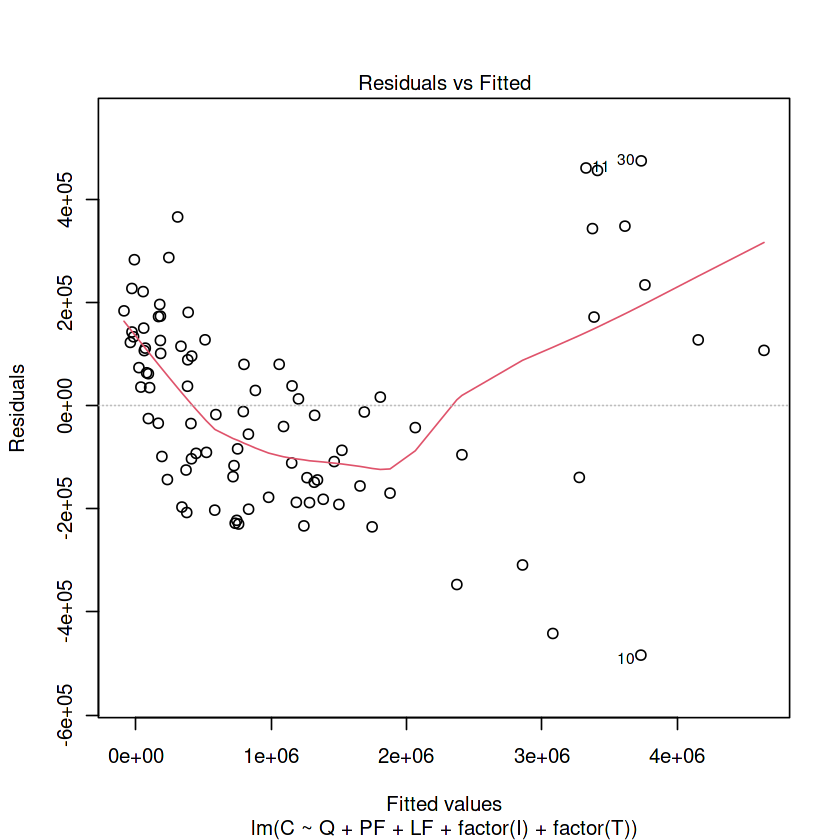

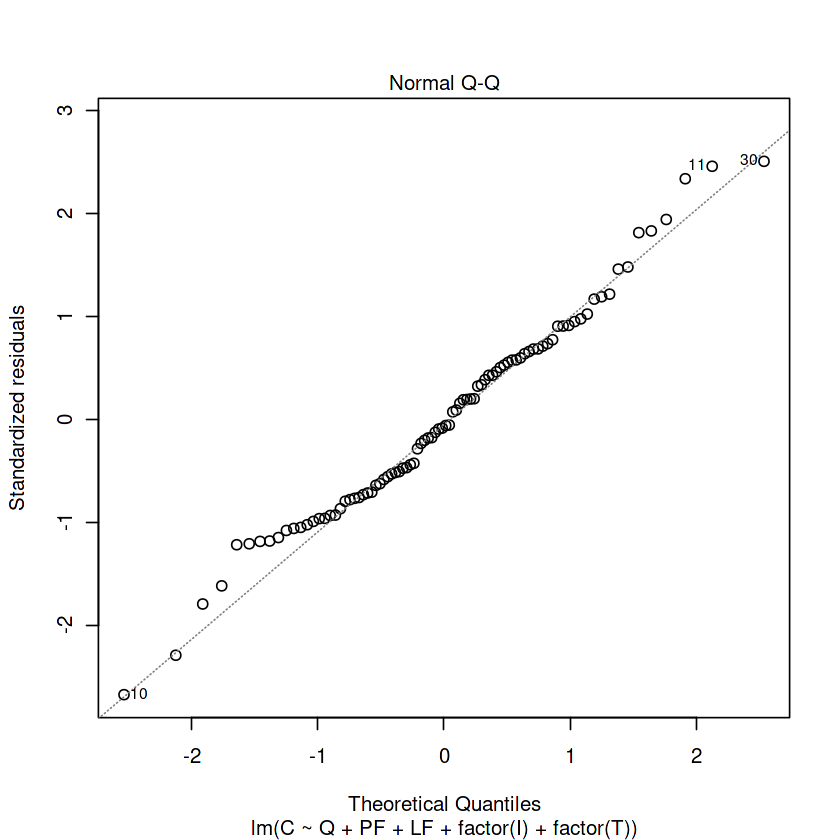

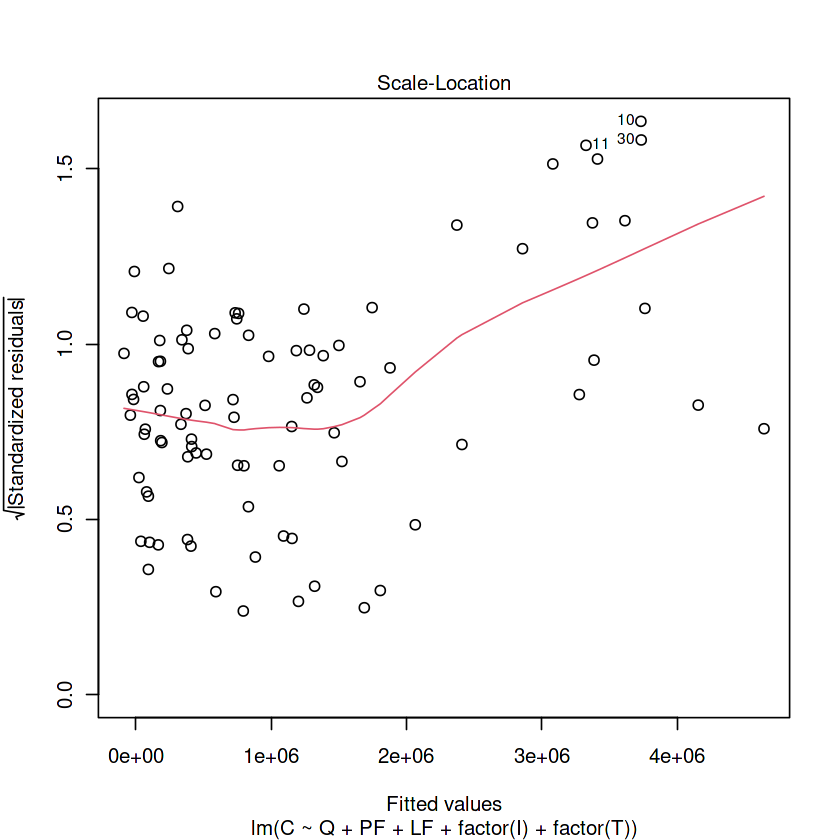

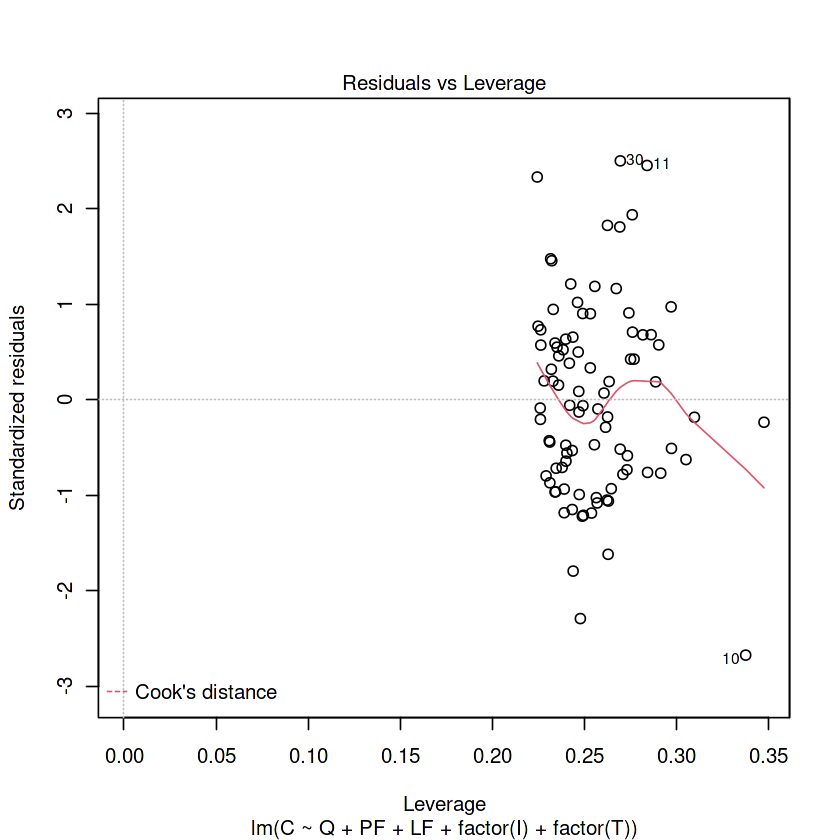

In [31]:
plot(lmMod)

The plots we are interested in are residuals vs fitted values and standardised residuals on Y axis. If there is absolutely no heteroscedastity, you should see a completely random, equal distribution of points throughout the range of X axis and a flat red line.

But in our case, as you can notice from the residuals vs fitted values plot, the red line is slightly curved and the residuals seem to increase as the fitted Y values increase. So, the inference here is, heteroscedasticity exists.

<a id="17.2"></a> <br>
# 17.2 Breusch-Pagan (BP) Test

Breusch-Pagan (BP) fits a linear regression model to the residuals of a linear regression model (by default the same explanatory variables are taken as in the main regression model) and rejects if too much of the variance is explained by the additional explanatory variables.

For the BP test we assume there is no heteroscedasticity(is homoskedasticity) as a null hypothesis and the existence of heteroscedasticity as the alternative hypothesis.


Under H0 the test statistic of the Breusch-Pagan test follows a chi-squared distribution with parameter (the number of regressors without the constant in the model) degrees of freedom.


Breusch-Pagan (BP) test is done by using function bptest () which is available in library “lmtest”.

In [32]:
library(lmtest)
bptest(C ~ Q+PF+LF+factor(I)+factor(T), data=pdata, studentize=F)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	Breusch-Pagan test

data:  C ~ Q + PF + LF + factor(I) + factor(T)
BP = 46.168, df = 22, p-value = 0.001881


As the P-value of the BP test is less than 5%, indicates the variance is changing in the residual as the predictor value increases, thus we can reject the null hypothesis. Therefore, the data has heteroscedasticity.

<a id="17.3"></a> <br>
# 17.3 Box-Cox transformation -  To rectify Heteroscedasticity

[Go to Top](#0.1)

Box - Cox transformation is done to approximate the dataset to a normal distribution. 


In [33]:
distBCMod <- caret::BoxCoxTrans(pdata$C)
print(distBCMod)

Box-Cox Transformation

90 data points used to estimate Lambda

Input data summary:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  68978  292046  637001 1122524 1345968 4748320 

Largest/Smallest: 68.8 
Sample Skewness: 1.49 

Estimated Lambda: 0 
With fudge factor, Lambda = 0 will be used for transformations



In [34]:
pdata <- cbind(pdata, C_new=predict(distBCMod, pdata$C)) 
head(pdata)

,I,T,C,Q,PF,LF,C_new
,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,1,1,1140640,0.952757,106650,0.534487,13.94710
2,1,2,1215690,0.986757,110307,0.532328,14.01082
3,1,3,1309570,1.091980,110574,0.547736,14.08521
4,1,4,1511530,1.175780,121974,0.540846,14.22863
5,1,5,1676730,1.160170,196606,0.591167,14.33236
6,1,6,1823740,1.173760,265609,0.575417,14.41640


In [35]:
lmMod_bc <- lm(C_new ~ Q+PF+LF+factor(I)+factor(T), data=pdata)
bptest(lmMod_bc)


	studentized Breusch-Pagan test

data:  lmMod_bc
BP = 40.186, df = 22, p-value = 0.01028


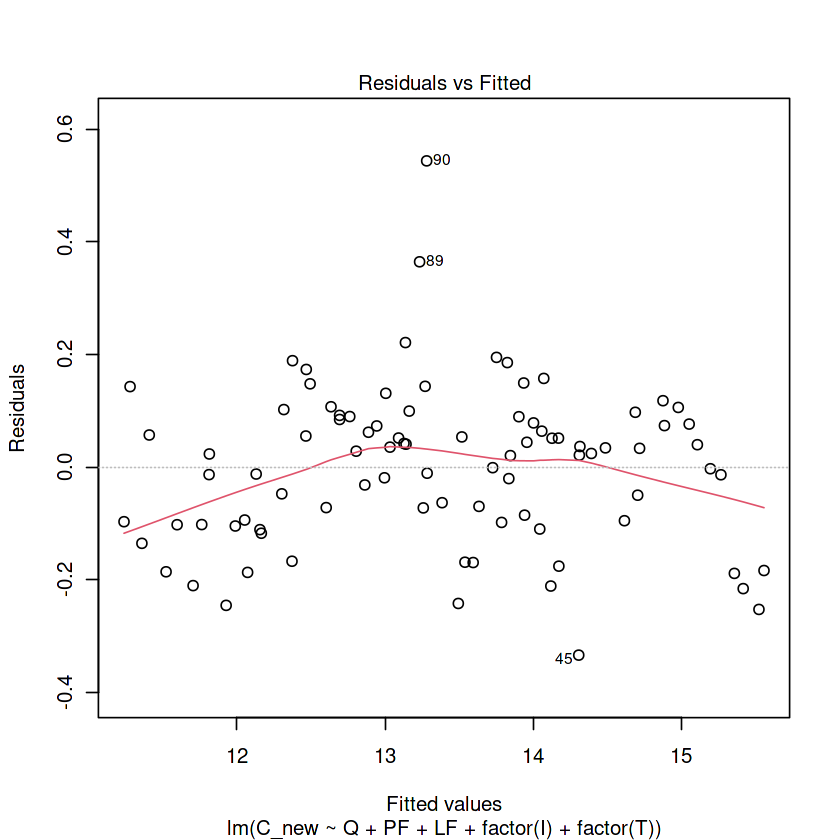

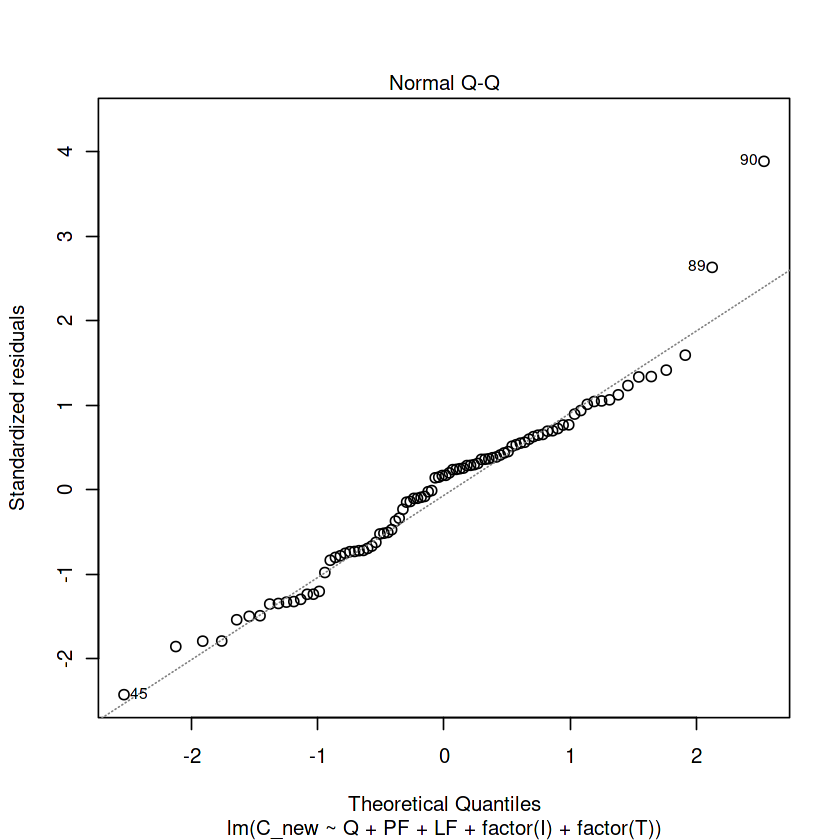

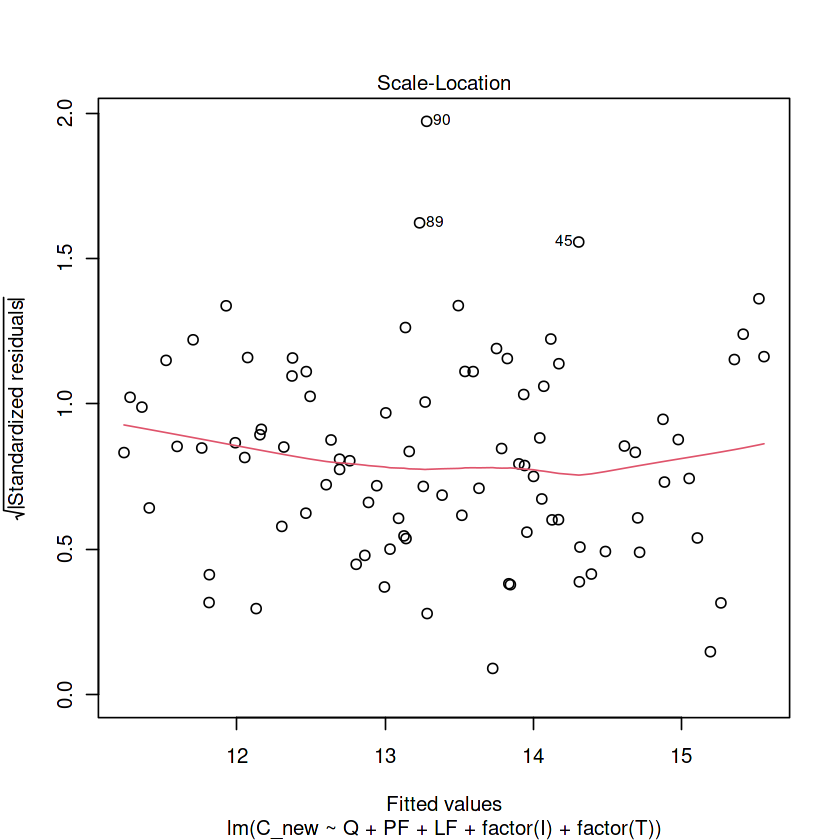

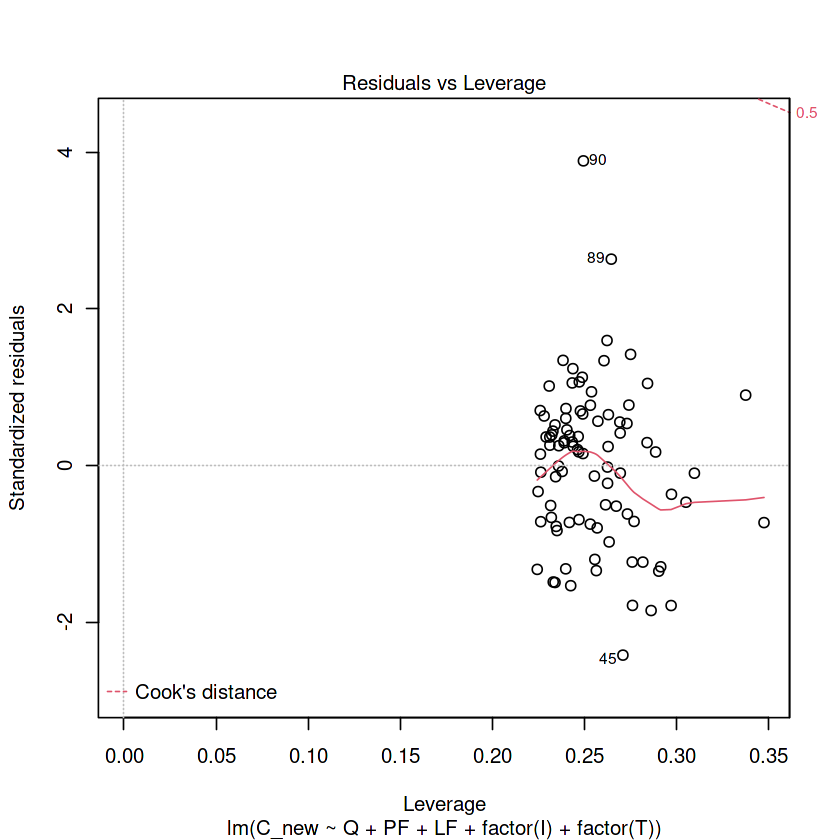

In [36]:
plot(lmMod_bc)

Now after Box-Cox transformation, residuals vs fitted values plot have a much flatter line.

<a id="17.4"></a> <br>
# 17.4 Heteroscedasticity Consistent Coefficients

In R coeftest() is used to find consistent coefficients of heteroscedasticity. Coeftest () returns an object of class "coeftest" which is essentially a coefficient matrix with columns containing the estimates, associated standard errors, test statistics, and p-values. vcovHC is used for estimating a robust covariance matrix of parameters for fixed-effect or random-effect according to the White model.

coeftest is  available in  lmtest package and coeftest() has a default method applicable to fitted "lm" objects.

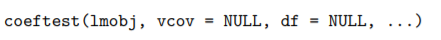

where vcov specifies the covariances either as a matrix, corresponding to the covariance matrix
estimate or as a function computing it from lmobj, corresponding to the covariance matrix
estimator

# Original coefficients

[Go to Top](#0.1)

In [37]:
coeftest(fixed)


t test of coefficients:

      Estimate  Std. Error t value  Pr(>|t|)    
Q   3.3190e+06  1.7135e+05 19.3694 < 2.2e-16 ***
PF  7.7307e-01  9.7319e-02  7.9437 9.698e-12 ***
LF -3.7974e+06  6.1377e+05 -6.1869 2.375e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# Heteroskedasticity consistent coefficients

vcovHC() is used for heteroscedasticity-consistent estimation of the covariance matrix of the coefficient estimates in regression models.

In [38]:
coeftest(fixed, vcovHC)


t test of coefficients:

      Estimate  Std. Error t value Pr(>|t|)    
Q   3.3190e+06  1.5824e+05 20.9748  < 2e-16 ***
PF  7.7307e-01  2.6536e-01  2.9133  0.00462 ** 
LF -3.7974e+06  1.6161e+06 -2.3497  0.02122 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


vcovHC() function estimates three heteroskedasticity-consistent covariance estimators:

* white1 - for general heteroskedasticity but no serial correlation. Recommended for random effects.
* white2 - is “white1” restricted to a common variance within groups. Recommended for random effects.
* arellano - both heteroskedasticity and serial correlation. Recommended for fixed effects.


# Heteroskedasticity consistent coefficients (Arellano)

In [39]:
coeftest(fixed, vcovHC(fixed, method = "arellano"))


t test of coefficients:

      Estimate  Std. Error t value Pr(>|t|)    
Q   3.3190e+06  1.5824e+05 20.9748  < 2e-16 ***
PF  7.7307e-01  2.6536e-01  2.9133  0.00462 ** 
LF -3.7974e+06  1.6161e+06 -2.3497  0.02122 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# HC standard errors of the coefficients

[Go to Top](#0.1)

If we have a linear regression model, with dependent variable yi, k-dimensional regressor xi with coefficient vector β and error term ui. It can be represented as: 

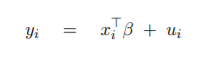

where i = 1, . . . , n.

Then covariance matrix can be denoted as :

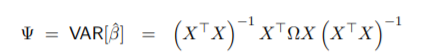


If it is assumed that the errors ui are independent but potentially heteroskedastic—a situation
which typically arises with cross-sectional data—their covariance matrix Ω is diagonal but has
nonconstant diagonal elements. Therefore, various HC estimators Ψˆ HC have been suggested
which are constructed by plugging an estimate of type Ω = diag( ˆ ω1, . . . , ωn).
These estimators differ in their choice of the ωi, an overview of the most important cases is
given in the following:

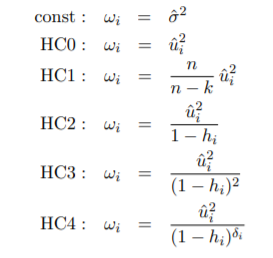

In [40]:
 t(sapply(c("HC0", "HC1", "HC2", "HC3", "HC4"),
           function(x) sqrt(diag(vcovHC(fixed, method = "arellano", type = x)))))

,Q,PF,LF
HC0,158238.3,0.2653576,1616089
HC1,160943.4,0.2698939,1643716
HC2,162656.8,0.2714679,1669333
HC3,167246.8,0.2777873,1724638
HC4,166581.8,0.2765686,1733385



* HC0 - heteroskedasticity consistent. The default.
* HC1,HC2, HC3 – Recommended for small samples. HC3 gives less weight to influential observations.
* HC4 - small samples with influential observations HAC - heteroskedasticity and autocorrelation consistent.

<a id="18"></a> <br>
# 18. Reference

https://www.princeton.edu/~otorres/Panel101R.pdf

https://cran.r-project.org/web/packages/sandwich/vignettes/sandwich.pdf

https://www.r-bloggers.com/2016/01/how-to-detect-heteroscedasticity-and-rectify-it/
